<a href="https://colab.research.google.com/github/huntersarnelli/huntersarnelli/blob/master/DSML_Admissions_%7BH_S%7D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codesmith Take Home Challenge

For this take home challenge you will be using foundational data science python libraries to analyze a dataset related to diabetes patients and develop a basic logistic regression model.

The libraries we will be using are:
 - [Pandas](https://pandas.pydata.org/)
 - [Sklearn](https://scikit-learn.org/stable/)
 - [Matplotlib](https://www.w3schools.com/python/matplotlib_pyplot.asp)

The data is collected from the Behavioral Risk Factor Surveillance System (BRFSS) dataset and provided by [Kaggle](https://www.kaggle.com/competitions/diabetes-prediction-competitiontfug-chd-nov-2022/data). You can view the raw data [here](https://raw.githubusercontent.com/CodesmithLLC/dsml-datasets/main/train_dataset.csv).

Submit your answers to the prompts [here](https://forms.gle/66VdMARikw7BAYs97)

## Getting Started
- Make a copy of this notebook and name `DSML_Admissions_{Your Initials}.py` (File -> Save a Copy in Drive)
- Complete the challenges below. Answer each question in a separate cell.
- Submit your answers questions in the take home form.

## Do's and Don'ts

Only use Pandas to gather information about this dataset. Do not load the data file with an external program like Excel or Google Sheet.


## Challenge 1
Use the pandas library to explore the provided dataset and answer the questions in the Google Form.

In [1]:
%%capture
!python3 -m pip install --upgrade pip setuptools wheel request
!pip3 install pandas sklearn matplotlib

In [2]:
import pandas as pd

In [3]:
train_dataset = pd.read_csv('https://raw.githubusercontent.com/CodesmithLLC/dsml-datasets/main/train_dataset.csv')
train_dataset

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,5.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0
1,11.0,0.0,1.0,1.0,39.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,20.0,30.0,1.0,1.0,1.0,1.0
2,11.0,0.0,0.0,1.0,20.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
3,10.0,1.0,1.0,1.0,34.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,0.0,30.0,1.0,1.0,1.0,0.0
4,7.0,1.0,1.0,1.0,33.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58288,9.0,1.0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,3.0,0.0,1.0,1.0,0.0
58289,8.0,1.0,0.0,1.0,27.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0
58290,9.0,1.0,0.0,1.0,36.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,30.0,1.0,1.0,1.0,0.0
58291,9.0,1.0,0.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# write pandas code here to answer Part 1 questions
#Lets find the max BMI and min BMI using simple commands
max_value_BMI = train_dataset['BMI'].max()
min_value_BMI = train_dataset['BMI'].min()

print("The max BMI is:", max_value_BMI)
print("The min BMI is:", min_value_BMI)

#Since the value in this column is 1 or 0, we can add all the values in column together to count the total number of 1s. This yields total number that have High Chol.

High_Chol_num = train_dataset['HighChol'].sum()
print("The number of people with High Chol is:", High_Chol_num)

#first lets find the number of physically active. For the same reason above, lets add all the values in column together. This will be the denominator of our calculation.

Phys_Active_num = train_dataset['PhysActivity'].sum()

#Now lets make a new column that only has positive value for physically active people. This allows us to ignore the ones who are not physically active.

train_dataset['PA'] = train_dataset['BMI']*train_dataset['PhysActivity']

#Now we can take the sum of this new column "PA" and divide by the number of Phys_Active_num to find average. PA will be our numerator in the calculation.

AVG_BMI_PA = (train_dataset['PA'].sum())/Phys_Active_num

print("The average BMI for physcically active people is:", AVG_BMI_PA)

#Lets find the total number of kids in each age group. This will be the denominator in our calculation.

Number_1 = (train_dataset['Age'].eq(1)).sum()

Number_2 = (train_dataset['Age'].eq(2)).sum()

Number_3 = (train_dataset['Age'].eq(3)).sum()

Number_4 = (train_dataset['Age'].eq(4)).sum()

Number_5 = (train_dataset['Age'].eq(5)).sum()

Number_6 = (train_dataset['Age'].eq(6)).sum()

Number_7 = (train_dataset['Age'].eq(7)).sum()

Number_8 = (train_dataset['Age'].eq(8)).sum()

Number_9 = (train_dataset['Age'].eq(9)).sum()

Number_10 = (train_dataset['Age'].eq(10)).sum()

Number_11 = (train_dataset['Age'].eq(11)).sum()

Number_12 = (train_dataset['Age'].eq(12)).sum()

Number_13 = (train_dataset['Age'].eq(13)).sum()

#Now lets create a new Column that only has kids with diabities.

train_dataset['AD'] = train_dataset['Age']*train_dataset['Diabetes']

#Now lets count the number of kids by age in this new column. This will be the numerator in our calculation.

Number_D1 = (train_dataset['AD'].eq(1)).sum()

Number_D2 = (train_dataset['AD'].eq(2)).sum()

Number_D3 = (train_dataset['AD'].eq(3)).sum()

Number_D4 = (train_dataset['AD'].eq(4)).sum()

Number_D5 = (train_dataset['AD'].eq(5)).sum()

Number_D6 = (train_dataset['AD'].eq(6)).sum()

Number_D7 = (train_dataset['AD'].eq(7)).sum()

Number_D8 = (train_dataset['AD'].eq(8)).sum()

Number_D9 = (train_dataset['AD'].eq(9)).sum()

Number_D10 = (train_dataset['AD'].eq(10)).sum()

Number_D11 = (train_dataset['AD'].eq(11)).sum()

Number_D12 = (train_dataset['AD'].eq(12)).sum()

Number_D13 = (train_dataset['AD'].eq(13)).sum()

#Now to find the max percent with each age group

my_list = [(Number_D1/Number_1), (Number_D2/Number_2), (Number_D3/Number_3), (Number_D4/Number_4), (Number_D5/Number_5), (Number_D6/Number_6), (Number_D7/Number_7), (Number_D8/Number_8), (Number_D9/Number_9), (Number_D10/Number_10), (Number_D11/Number_11), (Number_D12/Number_12), (Number_D13/Number_13)]

print("The highest percent of kids with diabetes by age:", max(my_list))

print("The age with the highest percent with diabetes is:", my_list.index(max(my_list))+1)


train_dataset.describe()

The max BMI is: 98.0
The min BMI is: 12.0
The number of people with High Chol is: 31177.0
The average BMI for physcically active people is: 29.46888783868935
The highest percent of kids with diabetes by age: 0.6613038612199217
The age with the highest percent with diabetes is: 11


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke,PA,AD
count,58293.000000,58293.000000,58293.000000,58293.000000,58293.000000,58293.000000,58293.000000,58293.000000,58293.000000,58293.000000,58293.000000,58293.000000,58293.000000,58293.000000,58293.000000,58293.000000,58293.000000,58293.000000,58293.000000,58293.000000
mean,8.606591,0.479269,0.534833,0.967217,30.221021,0.509341,0.153226,0.653389,0.567753,0.759011,0.045803,2.938243,4.020448,6.400820,0.282744,0.532928,0.565883,0.068893,19.254645,4.963718
std,2.857449,0.499574,0.498789,0.178069,7.577594,0.499917,0.360208,0.475895,0.495393,0.427688,0.209060,1.101764,8.330677,10.333056,0.450337,0.498919,0.495645,0.253275,15.141341,4.961075
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,5.000000
75%,11.000000,1.000000,1.000000,1.000000,34.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,7.000000,1.000000,1.000000,1.000000,0.000000,30.000000,10.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000,98.000000,13.000000


## Challenge 2

Now that we have some familiarity with this dataset, we'll train a simple [logistic regression](https://www.youtube.com/watch?v=yIYKR4sgzI8) model using the Scikit-learn library. Your main task is to generate evaluation metrics to assess the model's performance, while the code for training the logistic model has been provided for you.

In [5]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
import numpy as np

In [6]:
model = LogisticRegression()

In [7]:
test_dataset = pd.read_csv('https://raw.githubusercontent.com/CodesmithLLC/dsml-datasets/main/test_dataset.csv')

In [8]:
train_X = train_dataset[['BMI', 'GenHlth', 'Age']]
train_Y = train_dataset[['Diabetes']].values.reshape(-1)

In [9]:
model.fit(train_X, train_Y)

LogisticRegression()

[[17796  9431]
 [ 7531 23535]]


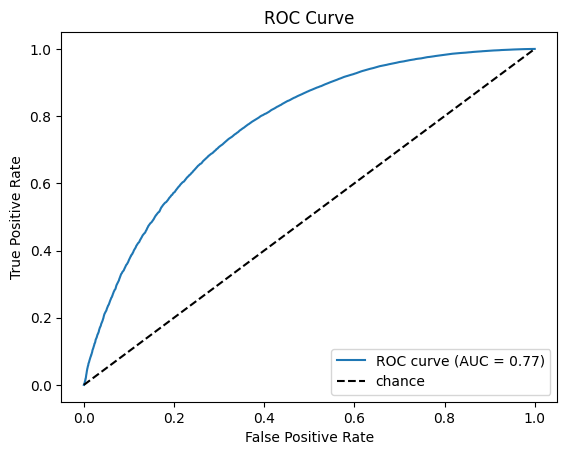

The F1 score is: 0.7351011994002999
Predicted Log-Odds (Logits): [-4.02128495]
The Coefficients are: [[0.07265682 0.6681275  0.2034328 ]]


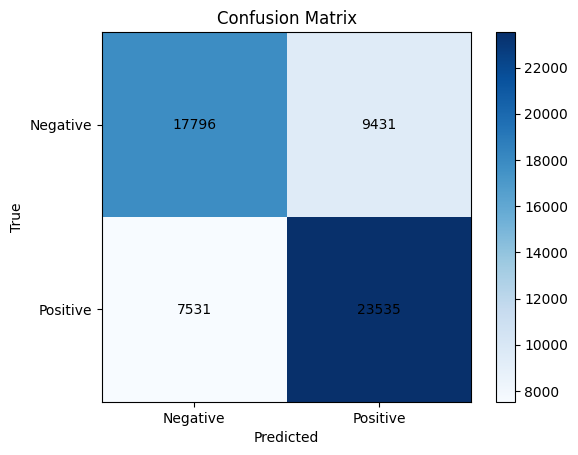

In [10]:
# write code here to answer questions for Part 2

y_predict = model.predict(train_X)
cm = confusion_matrix(train_Y, y_predict)
print(cm)

y_pred_prob = model.predict_proba(train_X)[:, 1]
fpr, tpr, thresholds = roc_curve(train_Y, y_pred_prob)
auc = roc_auc_score(train_Y, y_pred_prob)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--', label='chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

F1 = f1_score(train_Y, y_predict)

print("The F1 score is:", F1)


BMI = 1.2
GenHlth_coefficient = 2.3
Age_coefficient = 0.5

# Lets find the intercept and coefficients from the model
intercept = model.intercept_
coefficients = model.coef_

# Lets calculate the predicted log-odds (logits)
logit_p = intercept + BMI * coefficients[0][0] + GenHlth_coefficient * coefficients[0][1] + Age_coefficient * coefficients[0][2]

print("Predicted Log-Odds (Logits):", logit_p)
print("The Coefficients are:", coefficients)

# Confusion matrix values
values = np.array([[17796, 9431], [7531, 23535]])

# Create confusion matrix plot
fig, ax = plt.subplots()
im = ax.imshow(values, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_xticks(np.arange(len(values[0])))
ax.set_yticks(np.arange(len(values)))
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])
ax.set_title('Confusion Matrix')

# Loop over data dimensions and create text annotations
for i in range(len(values)):
    for j in range(len(values[0])):
        text = ax.text(j, i, values[i, j], ha='center', va='center', color='black')

# Display the confusion matrix

plt.show()


## Challenge 3

Solve the following question just using python:

- Total number of words. Strings like `a.k.a` and `e.g.` should be considered a single word
- Total number of unique words. `"spam"` and `spam` should be considered the same word
- What is the most frequent word that appears in the below text (case insenstive)? Exclude stop words (e.g `and`, `or`, `the`). A list of stop words have been provided.

## Do's and Don'ts

Do not download (`pip install`) any external libs to solve this problem. Just use python and any built-in modules you may need.

In [11]:
# source: https://sites.astro.caltech.edu/~george/ay122/cacm12.pdf
TEXT = '''
Machine learning systems automatically learn programs from
data. This is often a very attractive alternative to manually
constructing them, and in the last decade the use of machine
learning has spread rapidly throughout computer science
and beyond. Machine learning is used in Web search, spam
filters, recommender systems, ad placement, credit scoring,
fraud detection, stock trading, drug design, and many other
applications. A recent report from the McKinsey Global Institute asserts that machine learning (a.k.a. data mining or
predictive analytics) will be the driver of the next big wave of
innovation [15]. Several fine textbooks are available to interested practitioners and researchers (e.g, [16, 24]). However,
much of the “folk knowledge” that is needed to successfully
develop machine learning applications is not readily available in them. As a result, many machine learning projects
take much longer than necessary or wind up producing lessthan-ideal results. Yet much of this folk knowledge is fairly
easy to communicate. This is the purpose of this article.
Many different types of machine learning exist, but for illustration purposes I will focus on the most mature and
widely used one: classification. Nevertheless, the issues I
will discuss apply across all of machine learning. A classifier is a system that inputs (typically) a vector of discrete
and/or continuous feature values and outputs a single discrete value, the class. For example, a spam filter classifies
email messages into “spam” or “not spam,” and its input may
be a Boolean vector x = (x1, . . . , xj , . . . , xd), where xj = 1
if the jth word in the dictionary appears in the email and
xj = 0 otherwise. A learner inputs a training set of examples (xi, yi), where xi = (xi,1, . . . , xi,d) is an observed input
and yi is the corresponding output, and outputs a classifier.
The test of the learner is whether this classifier produces the
correct output yt for future examples xt (e.g., whether the
spam filter correctly classifies previously unseen emails as
spam or not spam).
'''

STOP_WORDS = ['a', 'an', 'the', 'in', 'on', 'at', 'for', 'is', 'it', 'and', 'or', 'but', 'with', 'of', 'to']

In [17]:
# Write your code here

words = TEXT.split()
filtered_words = [word for word in words if word.lower() not in STOP_WORDS]


print("Number of words in the text including the stop words is:", len(words))
print("Number of words in the text excluding the stop words is:", len(filtered_words))

import re
def count_unique_words2(text):
    # This will remove punctuation and convert all the text to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())

    # This splits the text into words in a list formatt
    words2 = text.split()

    # Now we can convert into a set to avoid double counting then take the length of this set to find number of unique words.

    Unique_words2 = set(words2)
    Unique_word_count2 = len(Unique_words2)

    return Unique_word_count2


result = count_unique_words2(TEXT)
print("The number of unique words is:", result)




from collections import Counter
import re

def most_common_word(text, stop_words=None):
    # This will remove the punctuation and convert the text to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())

    # This splits the text into words
    words = text.split()

    # This gives the option to remove stop words if desired
    if stop_words:
      words = [word for word in words if word not in stop_words]

    # This counts the occurrence of each word
    word_counts = Counter(words)

    # This will find the most common word
    most_common = word_counts.most_common(1)

    return most_common[0][0] if most_common else None


result = most_common_word(TEXT,)
print("The most common word is:", result)

print("The most common words excluding stop words is:", most_common_word(TEXT,STOP_WORDS))


def most_common_word3(text, stop_words=None):
    # This will remove the punctuation and convert the text to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())

    # This splits the text into words
    words = text.split()

    # This gives the option to remove stop words if desired
    if stop_words:
      words = [word for word in words if word not in stop_words]

    # This counts the occurrence of each word
    word_counts = Counter(words)

    # This will find the third most common word most_common(3) retrieves the 3 most common. The [2][0] indexing access the third most common word from the list.
    most_common3 = word_counts.most_common(3)

    return most_common3[2][0] if most_common3 else None


result3 = most_common_word3(TEXT,)
print("The most common word is:", result3)

print("The most common words excluding stop words is:", most_common_word3(TEXT,STOP_WORDS))


Number of words in the text including the stop words is: 342
Number of words in the text excluding the stop words is: 262
The number of unique words is: 191
The most common word is: the
The most common words excluding stop words is: machine
The most common word is: of
The most common words excluding stop words is: spam
